In [1]:
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 100)
pd.set_option("max_colwidth", 200)

from sklearn import preprocessing
from sklearn.ensemble import StackingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from catboost import CatBoostRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import RepeatedKFold

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ordinal = pd.read_csv('OrdinalDropIF.csv')
ordinal.shape

(2579, 83)

In [3]:
ordinal = ordinal.drop(['Unnamed: 0', 'PID', 'Unnamed: 0.1'], axis=1)
ordinal.shape

(2579, 80)

In [4]:
X = ordinal.drop(['SalePrice'], axis=1)
y = ordinal.SalePrice

In [5]:
gb = GradientBoostingRegressor(random_state=1)
cb = CatBoostRegressor(random_state=1, verbose=False)

### n_jobs @ 2, 1, None makes no impact on stacking_regressor.score

In [6]:
stacking_regressor1 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, n_jobs=2,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [7]:
stacking_regressor1.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f68bdfc10>,
                  n_jobs=2, passthrough=True)

In [8]:
stacking_regressor1.score(X,y)

0.9897018033261333

In [9]:
stacking_regressor2 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, n_jobs=1,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [10]:
stacking_regressor2.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f68bdfc10>,
                  n_jobs=1, passthrough=True)

In [11]:
stacking_regressor2.score(X,y)

0.9897018033261333

In [12]:
stacking_regressor3 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                       cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1),
                                       passthrough=True)

In [13]:
stacking_regressor3.fit(X,y)

StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f68bdfc10>,
                  passthrough=True)

In [14]:
stacking_regressor3.score(X,y)

0.9897018033261333

### cv=5, cv=5, or None has no impact on stacking_regressor.score

In [15]:
stacking_regressor4 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [16]:
stacking_regressor4.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f68bdfc10>,
                  passthrough=True)

In [17]:
stacking_regressor4.score(X,y)

0.9895260202778695

In [18]:
stacking_regressor5 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb,
                                        cv=5,
                                        passthrough=True)

In [19]:
stacking_regressor5.fit(X,y)

StackingRegressor(cv=5,
                  estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f68bdfc10>,
                  passthrough=True)

In [20]:
stacking_regressor5.score(X,y)

0.9895260202778695

In [21]:
stacking_regressor6 = StackingRegressor(estimators=[('GB', gb)], final_estimator=cb, passthrough=True)

In [22]:
stacking_regressor6.fit(X,y)

StackingRegressor(estimators=[('GB',
                               GradientBoostingRegressor(random_state=1))],
                  final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f68bdfc10>,
                  passthrough=True)

In [23]:
stacking_regressor6.score(X,y)

0.9895260202778695

### scores1, scores2, scores3 --> produce same results (same StackingRegressor + same cv)

### scores4, scores5, scores5 --> produce same results (same StackingRegressor w/default cv for train, same cv for test)

In [24]:
scores1 = cross_validate(stacking_regressor1, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [25]:
scores1

{'fit_time': array([4.13010693, 4.10753822, 4.09942222, 4.09884   , 4.08688807]),
 'score_time': array([0.00486112, 0.00344777, 0.00344992, 0.00364685, 0.00344014]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f302f3d30>,
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f302c4dc0>,
                    n_jobs=2, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                     

In [26]:
scores2 = cross_validate(stacking_regressor2, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [27]:
scores2

{'fit_time': array([5.14131999, 5.12553596, 5.11472011, 5.11646891, 5.08965898]),
 'score_time': array([0.00340605, 0.00338197, 0.00345898, 0.00470614, 0.0033772 ]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f637b6d30>,
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f302c4d30>,
                    n_jobs=1, passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                     

In [28]:
scores3 = cross_validate(stacking_regressor3, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [29]:
scores3

{'fit_time': array([5.13910103, 5.12301993, 5.09604502, 5.11009026, 5.09151888]),
 'score_time': array([0.00341702, 0.00336003, 0.00338197, 0.003371  , 0.00601697]),
 'estimator': [StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f6378bd30>,
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f68dbff70>,
                    passthrough=True),
  StackingRegressor(cv=RepeatedKFold(n_repeats=1, n_splits=5, random_state=1),
                    estimators=[('GB',
                                 Gradient

In [30]:
scores4 = cross_validate(stacking_regressor4, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [31]:
scores4

{'fit_time': array([5.13405704, 5.12145829, 5.09293389, 5.1557281 , 5.2194891 ]),
 'score_time': array([0.00334001, 0.00332594, 0.00338507, 0.00552392, 0.00479794]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f63957250>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f68dc6340>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f8064cd30>,
                    passth

In [32]:
scores5 = cross_validate(stacking_regressor5, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [33]:
scores5

{'fit_time': array([5.14889598, 5.11964965, 5.113976  , 5.10676885, 5.12589693]),
 'score_time': array([0.0033958 , 0.00338817, 0.00336885, 0.0034101 , 0.00342894]),
 'estimator': [StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f6395e610>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f68d97130>,
                    passthrough=True),
  StackingRegressor(cv=5,
                    estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f68d97cd0>,
                    passth

In [34]:
scores6 = cross_validate(stacking_regressor6, X, y, cv=RepeatedKFold(n_splits=5, n_repeats=1, random_state=1), return_estimator=True)

In [35]:
scores6

{'fit_time': array([5.14857697, 5.0995841 , 5.09657407, 5.10608506, 5.09965205]),
 'score_time': array([0.00335193, 0.00345683, 0.003407  , 0.00477099, 0.00337696]),
 'estimator': [StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f63989310>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f639a23d0>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                                 GradientBoostingRegressor(random_state=1))],
                    final_estimator=<catboost.core.CatBoostRegressor object at 0x7f7f639a2430>,
                    passthrough=True),
  StackingRegressor(estimators=[('GB',
                          

In [36]:
# Use cross-validation to evaluate model performance

def evaluate_model(model, X, y):
    
    # define the evaluation procedure
    cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
    
    # evaluate the model and collect the results
    scores = cross_validate(model, X, y, cv=cv, n_jobs=-1)
    
    #scores = cross_validate(model, X, y, scoring=scoring, 
    #                              cv=cv, n_jobs=-1) 
    
    df = pd.DataFrame(scores)
    
    return df

In [37]:
cat = evaluate_model(cb, X, y)

In [38]:
cat

,fit_time,score_time,test_score
0,5.670196,0.005129,0.935051
1,5.867435,0.007259,0.940925
2,6.557427,0.003919,0.904279
3,8.618660,0.020024,0.914509
4,5.738400,0.006770,0.948420
5,8.648686,0.020753,0.929249
6,7.749516,0.024749,0.936556
7,8.237473,0.021537,0.927905
8,4.336497,0.004315,0.897123
9,4.359799,0.004879,0.949209


In [39]:
cat = cat[['test_score']].rename(columns={'test_score':'cat_score'})

In [40]:
cat

,cat_score
0,0.935051
1,0.940925
2,0.904279
3,0.914509
4,0.948420
5,0.929249
6,0.936556
7,0.927905
8,0.897123
9,0.949209


In [41]:
g = evaluate_model(gb, X, y)

In [42]:
g

,fit_time,score_time,test_score
0,0.910318,0.005791,0.920524
1,0.922458,0.002268,0.933841
2,0.936816,0.002359,0.868476
3,0.927231,0.002298,0.890834
4,0.910823,0.002256,0.925737
5,0.909781,0.002357,0.915637
6,0.933568,0.002296,0.924019
7,0.920353,0.006374,0.915101
8,0.883141,0.003088,0.857383
9,0.871213,0.004951,0.930269


In [43]:
g = g[['test_score']].rename(columns={'test_score':'gb_score'})

In [44]:
g

,gb_score
0,0.920524
1,0.933841
2,0.868476
3,0.890834
4,0.925737
5,0.915637
6,0.924019
7,0.915101
8,0.857383
9,0.930269


In [45]:
df1 = evaluate_model(stacking_regressor1, X, y)

In [46]:
df1

,fit_time,score_time,test_score
0,10.831016,0.007027,0.935487
1,10.956966,0.009113,0.937959
2,11.894563,0.007639,0.900079
3,11.240306,0.013818,0.908059
4,10.801987,0.010007,0.943991
5,11.605929,0.009292,0.927102
6,11.000322,0.015826,0.935831
7,10.838083,0.020362,0.919291
8,10.208153,0.005840,0.896937
9,10.179736,0.006966,0.943061


In [47]:
df1 = df1[['test_score']].rename(columns={'test_score':'test_score_1'})

In [48]:
df1

,test_score_1
0,0.935487
1,0.937959
2,0.900079
3,0.908059
4,0.943991
5,0.927102
6,0.935831
7,0.919291
8,0.896937
9,0.943061


In [49]:
df2 = evaluate_model(stacking_regressor2, X, y)

In [50]:
df2

,fit_time,score_time,test_score
0,12.441838,0.006971,0.935487
1,11.209475,0.009534,0.937959
2,11.118896,0.007845,0.900079
3,11.287482,0.006201,0.908059
4,11.471033,0.009454,0.943991
5,11.214103,0.010828,0.927102
6,11.122557,0.008093,0.935831
7,11.270447,0.010319,0.919291
8,10.056416,0.009267,0.896937
9,10.154310,0.007057,0.943061


In [51]:
df2 = df2[['test_score']].rename(columns={'test_score':'test_score_2'})

In [52]:
df2

,test_score_2
0,0.935487
1,0.937959
2,0.900079
3,0.908059
4,0.943991
5,0.927102
6,0.935831
7,0.919291
8,0.896937
9,0.943061


In [53]:
df3 = evaluate_model(stacking_regressor3, X, y)

In [54]:
df3

,fit_time,score_time,test_score
0,14.853624,0.006170,0.935487
1,14.104060,0.009186,0.937959
2,13.951863,0.011264,0.900079
3,11.545502,0.010515,0.908059
4,11.158193,0.005603,0.943991
5,11.055158,0.008534,0.927102
6,10.960136,0.006961,0.935831
7,11.260138,0.012083,0.919291
8,10.534641,0.006154,0.896937
9,10.548895,0.007726,0.943061


In [55]:
df3 = df3[['test_score']].rename(columns={'test_score':'test_score_3'})

In [56]:
df3

,test_score_3
0,0.935487
1,0.937959
2,0.900079
3,0.908059
4,0.943991
5,0.927102
6,0.935831
7,0.919291
8,0.896937
9,0.943061


In [57]:
df4 = evaluate_model(stacking_regressor4, X, y)

In [58]:
df4

,fit_time,score_time,test_score
0,11.957366,0.007612,0.936110
1,13.933544,0.010396,0.938918
2,10.893973,0.009386,0.897480
3,10.782994,0.006054,0.906658
4,10.877610,0.011496,0.946295
5,11.347868,0.008886,0.922507
6,10.698107,0.011000,0.937190
7,10.623286,0.014508,0.915083
8,10.040508,0.004414,0.899309
9,11.168678,0.005051,0.937057


In [59]:
df4 = df4[['test_score']].rename(columns={'test_score':'test_score_4'})

In [60]:
df4

,test_score_4
0,0.936110
1,0.938918
2,0.897480
3,0.906658
4,0.946295
5,0.922507
6,0.937190
7,0.915083
8,0.899309
9,0.937057


In [61]:
df5 = evaluate_model(stacking_regressor5, X, y)

In [62]:
df5

,fit_time,score_time,test_score
0,11.632364,0.008449,0.936110
1,11.555125,0.008223,0.938918
2,11.460229,0.010192,0.897480
3,11.881072,0.006919,0.906658
4,12.685444,0.005554,0.946295
5,12.259770,0.007874,0.922507
6,11.280824,0.011689,0.937190
7,11.356425,0.010688,0.915083
8,10.253522,0.009248,0.899309
9,10.394769,0.006739,0.937057


In [63]:
df5 = df5[['test_score']].rename(columns={'test_score':'test_score_5'})

In [64]:
df5

,test_score_5
0,0.936110
1,0.938918
2,0.897480
3,0.906658
4,0.946295
5,0.922507
6,0.937190
7,0.915083
8,0.899309
9,0.937057


In [65]:
df6 = evaluate_model(stacking_regressor6, X, y)

In [66]:
df6

,fit_time,score_time,test_score
0,11.226204,0.003936,0.936110
1,10.653714,0.003898,0.938918
2,11.654301,0.018524,0.897480
3,11.809313,0.008243,0.906658
4,11.844578,0.012347,0.946295
5,11.729476,0.013190,0.922507
6,11.685621,0.017661,0.937190
7,11.997586,0.006387,0.915083
8,9.698738,0.007825,0.899309
9,10.109881,0.004570,0.937057


In [67]:
df6 = df6[['test_score']].rename(columns={'test_score':'test_score_6'})

In [68]:
df6

,test_score_6
0,0.936110
1,0.938918
2,0.897480
3,0.906658
4,0.946295
5,0.922507
6,0.937190
7,0.915083
8,0.899309
9,0.937057


In [69]:
combo = pd.concat([cat, g, df1, df2, df3, df4, df5, df6], axis=1)

In [70]:
combo

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
0,0.935051,0.920524,0.935487,0.935487,0.935487,0.936110,0.936110,0.936110
1,0.940925,0.933841,0.937959,0.937959,0.937959,0.938918,0.938918,0.938918
2,0.904279,0.868476,0.900079,0.900079,0.900079,0.897480,0.897480,0.897480
3,0.914509,0.890834,0.908059,0.908059,0.908059,0.906658,0.906658,0.906658
4,0.948420,0.925737,0.943991,0.943991,0.943991,0.946295,0.946295,0.946295
5,0.929249,0.915637,0.927102,0.927102,0.927102,0.922507,0.922507,0.922507
6,0.936556,0.924019,0.935831,0.935831,0.935831,0.937190,0.937190,0.937190
7,0.927905,0.915101,0.919291,0.919291,0.919291,0.915083,0.915083,0.915083
8,0.897123,0.857383,0.896937,0.896937,0.896937,0.899309,0.899309,0.899309
9,0.949209,0.930269,0.943061,0.943061,0.943061,0.937057,0.937057,0.937057


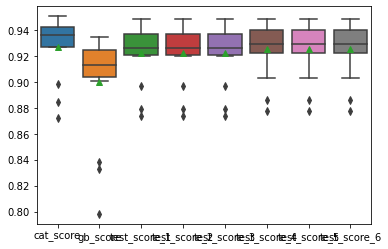

In [72]:
sns.boxplot(data=combo, showmeans=True);

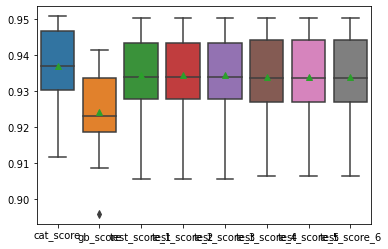

In [71]:
sns.boxplot(data=combo, showmeans=True);

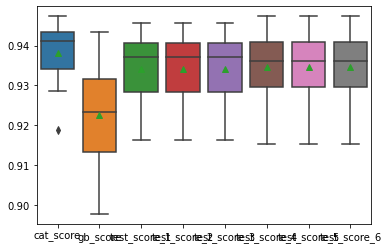

In [71]:
sns.boxplot(data=combo, showmeans=True);

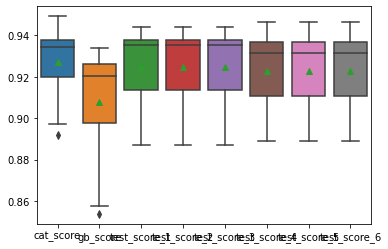

In [73]:
sns.boxplot(data=combo, showmeans=True);

In [72]:
combo.describe()

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.936878,0.924317,0.934417,0.934417,0.934417,0.933957,0.933957,0.933957
std,0.011131,0.012277,0.012178,0.012178,0.012178,0.012242,0.012242,0.012242
min,0.911824,0.895961,0.905740,0.905740,0.905740,0.906592,0.906592,0.906592
25%,0.930445,0.918784,0.927930,0.927930,0.927930,0.927128,0.927128,0.927128
50%,0.936986,0.923176,0.933977,0.933977,0.933977,0.933644,0.933644,0.933644
75%,0.946589,0.933732,0.943374,0.943374,0.943374,0.944266,0.944266,0.944266
max,0.950737,0.941296,0.950280,0.950280,0.950280,0.950220,0.950220,0.950220


In [72]:
combo.describe()

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.938227,0.922535,0.934212,0.934212,0.934212,0.934618,0.934618,0.934618
std,0.007841,0.013025,0.008465,0.008465,0.008465,0.009223,0.009223,0.009223
min,0.918753,0.897713,0.916298,0.916298,0.916298,0.915209,0.915209,0.915209
25%,0.934034,0.913221,0.928448,0.928448,0.928448,0.929690,0.929690,0.929690
50%,0.941039,0.923267,0.937244,0.937244,0.937244,0.936096,0.936096,0.936096
75%,0.943497,0.931634,0.940558,0.940558,0.940558,0.940802,0.940802,0.940802
max,0.947346,0.943442,0.945595,0.945595,0.945595,0.947324,0.947324,0.947324


In [71]:
combo.describe()

,cat_score,gb_score,test_score_1,test_score_2,test_score_3,test_score_4,test_score_5,test_score_6
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000
mean,0.927303,0.907919,0.924718,0.924718,0.924718,0.923032,0.923032,0.923032
std,0.017662,0.027205,0.018368,0.018368,0.018368,0.017757,0.017757,0.017757
min,0.892030,0.853744,0.887012,0.887012,0.887012,0.888940,0.888940,0.888940
25%,0.919950,0.897821,0.913675,0.913675,0.913675,0.910871,0.910871,0.910871
50%,0.934177,0.920524,0.935340,0.935340,0.935340,0.931273,0.931273,0.931273
75%,0.937682,0.926203,0.937912,0.937912,0.937912,0.936584,0.936584,0.936584
max,0.949209,0.933841,0.943991,0.943991,0.943991,0.946295,0.946295,0.946295
